<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="Rossum"></p>

<h1 style="text-align: center;">Deep Learning<br><br>Image Classification with CNN<br><br>Cat-Dog Classification Project<br><h1>

# Dataset Info

The Dogs vs. Cats dataset is a common computer vision dataset in which pictures are classified as either including a dog or a cat.

After the dataset is well studied, it can be used to understand and practice how to design, evaluate, and apply convolutional neural networks for image classification.

You will build a classifier with images and try to detect dogs versus cats using CNN.

Train set includes 12500 cat-5026 dog images, validation set includes 1219 cat-1071 dog images and test set incgludes 6897 cat and dogs images together. 

# Import Libraries and Export Images from Zip_File

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

#import warnings
#warnings.filterwarnings("ignore")
#warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [4]:
import tensorflow as tf

tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import zipfile

# Unzip the file
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/data/cat_dog_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

# Recognizing and Understanding Data

In [7]:
my_data_dir = "data"

In [8]:
os.listdir(my_data_dir)

['validation', 'test', 'train']

In [9]:
test_path = my_data_dir + '/test/'
validation_path = my_data_dir + '/validation/'
train_path = my_data_dir + '/train/'

In [12]:
os.listdir(train_path), os.listdir(validation_path)

(['dog', 'cat'], ['dog', 'cat'])

In [13]:
os.listdir(test_path)

['3635.jpg',
 '4876.jpg',
 '5838.jpg',
 '5058.jpg',
 '12180.jpg',
 '3000.jpg',
 '5656.jpg',
 '4063.jpg',
 '4133.jpg',
 '11846.jpg',
 '11077.jpg',
 '4979.jpg',
 '3961.jpg',
 '5335.jpg',
 '6783.jpg',
 '10482.jpg',
 '10245.jpg',
 '5008.jpg',
 '6627.jpg',
 '6443.jpg',
 '11347.jpg',
 '11289.jpg',
 '4089.jpg',
 '12159.jpg',
 '3590.jpg',
 '5351.jpg',
 '5728.jpg',
 '3966.jpg',
 '10538.jpg',
 '12136.jpg',
 '10130.jpg',
 '11517.jpg',
 '4360.jpg',
 '3455.jpg',
 '5607.jpg',
 '4180.jpg',
 '4936.jpg',
 '6033.jpg',
 '6416.jpg',
 '10027.jpg',
 '3362.jpg',
 '5395.jpg',
 '10929.jpg',
 '4747.jpg',
 '6334.jpg',
 '10613.jpg',
 '6440.jpg',
 '6307.jpg',
 '7161.jpg',
 '12459.jpg',
 '6266.jpg',
 '12495.jpg',
 '5225.jpg',
 '3176.jpg',
 '5650.jpg',
 '3311.jpg',
 '5003.jpg',
 '11958.jpg',
 '4514.jpg',
 '12149.jpg',
 '6090.jpg',
 '12462.jpg',
 '4516.jpg',
 '3399.jpg',
 '3604.jpg',
 '3282.jpg',
 '6543.jpg',
 '4910.jpg',
 '4502.jpg',
 '10488.jpg',
 '11529.jpg',
 '4451.jpg',
 '6301.jpg',
 '5564.jpg',
 '4843.jpg',
 '1

In [14]:
classes = os.listdir(train_path)
classes

['dog', 'cat']

In [15]:
import pathlib

data_dir = pathlib.Path(train_path) 
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) 
print(class_names)

['cat' 'dog']


**Let's check how many images there are.**

In [16]:
len(os.listdir(train_path+'cat')), len(os.listdir(train_path+'dog'))

(12500, 5026)

In [17]:
len(os.listdir(validation_path+'cat')), len(os.listdir(validation_path+'dog'))

(1219, 1071)

In [18]:
for dirpath, dirnames, filenames in os.walk(my_data_dir):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 3 directories and 0 images in 'data'.
There are 2 directories and 0 images in 'data/validation'.
There are 0 directories and 1071 images in 'data/validation/dog'.
There are 0 directories and 1219 images in 'data/validation/cat'.
There are 0 directories and 6897 images in 'data/test'.
There are 2 directories and 0 images in 'data/train'.
There are 0 directories and 5026 images in 'data/train/dog'.
There are 0 directories and 12500 images in 'data/train/cat'.


**Let's take an example images from both train-cat and train-dog folders to observe process** 

In [20]:
os.listdir(train_path+'cat')[:5]

['cat.9560.jpg',
 'cat.10959.jpg',
 'cat.2282.jpg',
 'cat.560.jpg',
 'cat.4056.jpg']

In [22]:
cat_sample_path = train_path+'cat'+ '/cat.560.jpg'
cat_sample_path

'data/train/cat/cat.560.jpg'

In [23]:
imread(cat_sample_path)

array([[[160,  71, 135],
        [164,  75, 139],
        [156,  67, 131],
        ...,
        [138, 130, 128],
        [133, 125, 123],
        [129, 121, 119]],

       [[148,  59, 123],
        [156,  67, 131],
        [152,  63, 127],
        ...,
        [133, 128, 125],
        [131, 126, 123],
        [128, 123, 120]],

       [[144,  54, 118],
        [155,  65, 129],
        [156,  66, 130],
        ...,
        [ 99,  93,  93],
        [101,  95,  95],
        [104,  98,  98]],

       ...,

       [[ 86,  80,  82],
        [ 80,  74,  76],
        [ 79,  73,  75],
        ...,
        [125, 113, 115],
        [129, 117, 119],
        [132, 120, 122]],

       [[ 77,  71,  73],
        [ 72,  66,  68],
        [ 71,  65,  67],
        ...,
        [127, 115, 117],
        [127, 115, 117],
        [123, 111, 113]],

       [[ 72,  66,  68],
        [ 67,  61,  63],
        [ 69,  63,  65],
        ...,
        [139, 127, 129],
        [137, 125, 127],
        [131, 119, 121]]

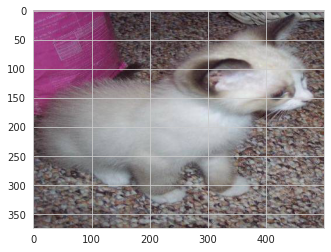

In [26]:
plt.imshow(imread(cat_sample_path));

In [27]:
os.listdir(train_path+'dog')[:5]

['dog.11695.jpg',
 'dog.10848.jpg',
 'dog.12336.jpg',
 'dog.12349.jpg',
 'dog.10031.jpg']

In [28]:
dog_sample_path = train_path+'dog'+ '/dog.10031.jpg'
dog_sample_path

'data/train/dog/dog.10031.jpg'

In [29]:
imread(dog_sample_path)

array([[[160, 147, 131],
        [165, 152, 136],
        [178, 165, 149],
        ...,
        [ 30,  13,  21],
        [ 50,  33,  41],
        [ 86,  69,  77]],

       [[189, 176, 160],
        [166, 153, 137],
        [150, 136, 123],
        ...,
        [ 57,  40,  50],
        [ 63,  46,  56],
        [ 75,  58,  68]],

       [[208, 194, 181],
        [174, 160, 147],
        [141, 127, 114],
        ...,
        [ 61,  44,  54],
        [ 72,  55,  65],
        [ 78,  61,  71]],

       ...,

       [[182, 164, 144],
        [222, 204, 184],
        [177, 156, 137],
        ...,
        [ 50,  45,  39],
        [ 56,  51,  45],
        [ 66,  61,  55]],

       [[183, 165, 143],
        [211, 193, 171],
        [185, 165, 141],
        ...,
        [ 79,  74,  68],
        [104,  99,  93],
        [125, 120, 114]],

       [[211, 193, 169],
        [232, 214, 190],
        [226, 206, 181],
        ...,
        [148, 143, 137],
        [176, 171, 165],
        [195, 190, 184]]

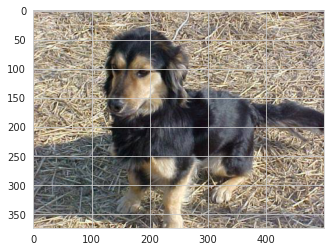

In [31]:
plt.imshow(imread(dog_sample_path));

In [32]:
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (472, 500, 3)


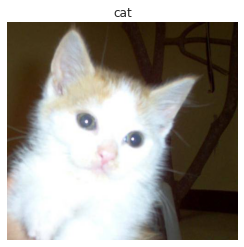

In [39]:
img = view_random_image(target_dir=train_path,
                        target_class="cat")

Image shape: (500, 493, 3)


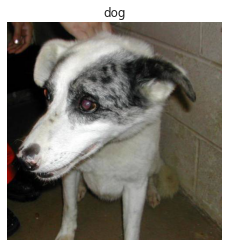

In [40]:
img = view_random_image(target_dir=train_path,
                        target_class="dog")

# Data Preprocessing

## Defining Input Shape

**Let's decide on the final dimension of these images.**

In [51]:
x = np.array([imread(train_path+'cat/'+image).shape[0] for image in os.listdir(train_path+'cat') if 'Thumbs.db' not in image])
y = np.array([imread(train_path+'cat/'+image).shape[1] for image in os.listdir(train_path+'cat') if 'Thumbs.db' not in image])

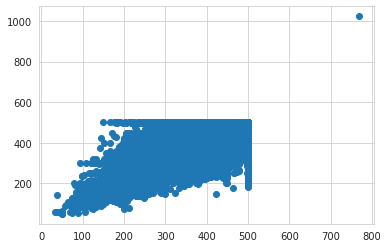

In [52]:
plt.scatter(x,y);

In [47]:
x1 = np.array([imread(train_path+'dog/'+image).shape[0] for image in os.listdir(train_path+'dog') if 'Thumbs.db' not in image])
y1 = np.array([imread(train_path+'dog/'+image).shape[1] for image in os.listdir(train_path+'dog') if 'Thumbs.db' not in image])

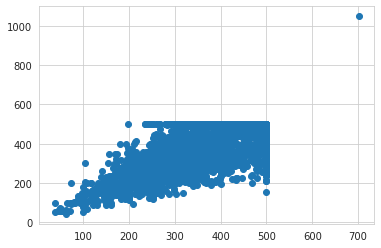

In [48]:
plt.scatter(x1,y1)

In [56]:
np.mean(x[x<550])

356.43419473557884

In [57]:
np.mean(y[y<550])

410.4736378910313

In [58]:
np.mean(x1[x1<550]), np.mean(y1[y1<550])

(364.98348258706466, 398.86348258706465)

In [59]:
image_shape = (350,400,3)

## Scalling

**Let's check the images if they are needed to be scaled or not**

In [60]:
imread(cat_sample_path).max()

246

In [61]:
imread(dog_sample_path).max()

255

**Images are needed to be scaled. They will scaled in image manipulation.**

## Image Data Generator

**Image Manipulation**

We can use the ImageDataGenerator to manipulate the images with rotation, resizing, and scaling so the model becomes more robust to different images that our data set doesn't have. ImageDataGenerator does the followings.

* Accepts a batch of images used for training.
* Applies a series of random transformations to each image in the batch.
* Replaces the original batch with randomly transformed batch.
* Training the CNN on this randomly transformed batch.

The goal of applying data augmentation is to have a more generalized model.

Data augmentation is a way to try and prevent a model overfitting. If your model is overfiting (e.g. the validation loss keeps increasing), you may want to try using data augmentation.

In [62]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [63]:
image_gen = ImageDataGenerator(rotation_range=15, 
                               width_shift_range=0.10, 
                               height_shift_range=0.10, 
                               rescale=1/255, 
                               shear_range=0.1, 
                               zoom_range=0.1, 
                               horizontal_flip=True, 
                               fill_mode='nearest')

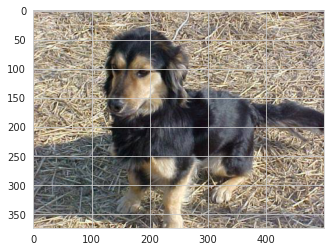

In [67]:
plt.imshow(imread(dog_sample_path))

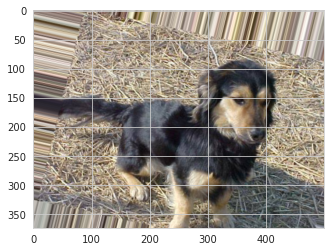

In [70]:
plt.imshow(image_gen.random_transform(imread(dog_sample_path)));

### Taking the path to a directory & Generating batches of augmented data

flow_from_directory function works with images organized in sub-directories. Your directories should include only one class of images, so one folder per class of images.

In [71]:
image_gen.flow_from_directory(train_path)

Found 17526 images belonging to 2 classes.


In [72]:
image_gen.flow_from_directory(validation_path)

Found 2290 images belonging to 2 classes.


In [73]:
image_gen.flow_from_directory(test_path)

Found 0 images belonging to 0 classes.


In [74]:
batch_size = 32

In [75]:
train_image_gen = image_gen.flow_from_directory(directory=train_path,
                                                target_size=image_shape[:2],
                                                color_mode='rgb',
                                                batch_size=batch_size,
                                                class_mode='binary',
                                                shuffle=True)

Found 17526 images belonging to 2 classes.


In [77]:
validation_image_gen = image_gen.flow_from_directory(directory=validation_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',
                                               shuffle=False)

Found 2290 images belonging to 2 classes.


In [78]:
train_image_gen.class_indices

{'cat': 0, 'dog': 1}

In [80]:
validation_image_gen.class_indices

{'cat': 0, 'dog': 1}

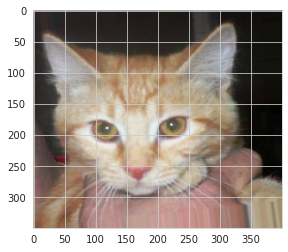

In [85]:
plt.imshow(train_image_gen[0][0][0])

In [86]:
train_image_gen[0][0][0].shape

(350, 400, 3)

# Modelling

### Model1 no weight

In [88]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

In [101]:
model1 = Sequential()

model1.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.5))

model1.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))


model1.add(Flatten())


model1.add(Dense(128))
model1.add(Activation('relu'))

model1.add(Dropout(0.5))

model1.add(Dense(1))
model1.add(Activation('sigmoid'))

# optimizer = keras.optimizers.Adam(lr=0.01)
model1.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [102]:
model1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 348, 398, 32)      896       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 174, 199, 32)     0         
 g2D)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 174, 199, 32)      0         
                                                                 
 conv2d_12 (Conv2D)          (None, 172, 197, 64)      18496     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 86, 98, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 84, 96, 64)       

In [103]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights = True)

In [104]:
model1.fit(train_image_gen,
          epochs=10,
          steps_per_epoch=len(train_image_gen),
          validation_data=validation_image_gen,
          validation_steps=len(validation_image_gen),
          callbacks=[early_stop])

Epoch 1/10
548/548 [==============================] - 618s 1s/step - loss: 0.6856 - accuracy: 0.7107 - val_loss: 0.8591 - val_accuracy: 0.5323
Epoch 2/10
548/548 [==============================] - 638s 1s/step - loss: 0.5863 - accuracy: 0.7137 - val_loss: 0.7487 - val_accuracy: 0.5323
Epoch 3/10
548/548 [==============================] - 606s 1s/step - loss: 0.5623 - accuracy: 0.7249 - val_loss: 0.8206 - val_accuracy: 0.5354
Epoch 4/10
548/548 [==============================] - 611s 1s/step - loss: 0.5377 - accuracy: 0.7398 - val_loss: 0.8305 - val_accuracy: 0.5498
Epoch 5/10
548/548 [==============================] - 613s 1s/step - loss: 0.5267 - accuracy: 0.7485 - val_loss: 0.7316 - val_accuracy: 0.5917
Epoch 6/10
548/548 [==============================] - 606s 1s/step - loss: 0.4961 - accuracy: 0.7670 - val_loss: 0.7253 - val_accuracy: 0.6083
Epoch 7/10
548/548 [==============================] - 609s 1s/step - loss: 0.4773 - accuracy: 0.7793 - val_loss: 0.7711 - val_accuracy: 0.6332

In [165]:
summary = pd.DataFrame(model1.history.history)
summary.tail(7)

""


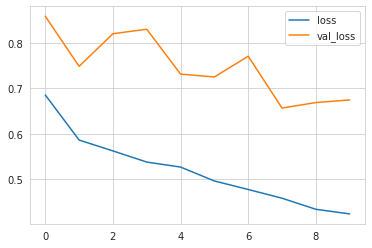

In [106]:
summary[["loss", "val_loss"]].plot();

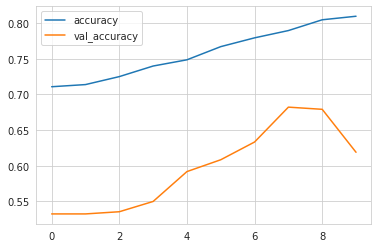

In [107]:
summary[["accuracy", "val_accuracy"]].plot();

# Evaluation on Test Data

In [108]:
from sklearn.metrics import classification_report, confusion_matrix

In [121]:
score = model1.evaluate(validation_image_gen)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

72/72 [==============================] - 67s 935ms/step - loss: 0.6824 - accuracy: 0.6197
Validation loss: 0.6824219226837158
Validation accuracy: 0.619650661945343


In [122]:
pred_prob = model1.predict(validation_image_gen)

In [116]:
y_pred = pred_prob > 0.5

In [117]:
y_valid = validation_image_gen.classes
y_valid

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [118]:
print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.99      0.73      1219
           1       0.96      0.19      0.31      1071

    accuracy                           0.62      2290
   macro avg       0.77      0.59      0.52      2290
weighted avg       0.76      0.62      0.54      2290



In [119]:
confusion_matrix(y_valid, y_pred)

array([[1210,    9],
       [ 872,  199]])

In [120]:
model1.save('cat_dog_1.h5')

## Model2 class weight

In [123]:
image_shape2 = (250,250,3)

In [124]:
image_gen2 = ImageDataGenerator(rotation_range=15, 
                               width_shift_range=0.10, 
                               height_shift_range=0.10, 
                               rescale=1/255, 
                               shear_range=0.1, 
                               zoom_range=0.1, 
                               horizontal_flip=True, 
                               fill_mode='nearest')

In [125]:
image_gen2.flow_from_directory(train_path)

Found 17526 images belonging to 2 classes.


In [126]:
image_gen2.flow_from_directory(validation_path)

Found 2290 images belonging to 2 classes.


In [127]:
image_gen2.flow_from_directory(test_path)

Found 0 images belonging to 0 classes.


In [128]:
batch_size = 32

In [129]:
train_image_gen2 = image_gen2.flow_from_directory(directory=train_path,
                                                target_size=image_shape2[:2],
                                                color_mode='rgb',
                                                batch_size=batch_size,
                                                class_mode='binary',
                                                shuffle=True)

Found 17526 images belonging to 2 classes.


In [130]:
validation_image_gen2 = image_gen2.flow_from_directory(directory=validation_path,
                                               target_size=image_shape2[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',
                                               shuffle=False)

Found 2290 images belonging to 2 classes.


In [162]:
model2 = Sequential()

model2.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=image_shape2, activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.5))

model2.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))


model2.add(Flatten())


model2.add(Dense(128))
model2.add(Activation('relu'))

model2.add(Dropout(0.5))

model2.add(Dense(1))
model2.add(Activation('sigmoid'))

# optimizer = keras.optimizers.Adam(lr=0.01)
model2.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [157]:
model2.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 248, 248, 32)      896       
                                                                 
 batch_normalization_7 (Batc  (None, 248, 248, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 124, 124, 32)     0         
 g2D)                                                            
                                                                 
 dropout_23 (Dropout)        (None, 124, 124, 32)      0         
                                                                 
 conv2d_33 (Conv2D)          (None, 122, 122, 64)      18496     
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 61, 61, 64)     

In [158]:
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights = True)

In [159]:
class_weights = {0: 0.5026, 1: 1.25}
class_weights

{0: 0.5026, 1: 1.25}

In [163]:
model2.fit(train_image_gen2,
          epochs=10,
          steps_per_epoch=len(train_image_gen2),
          validation_data=validation_image_gen2,
          validation_steps=len(validation_image_gen2),
          callbacks=[early_stop],
          class_weight=class_weights)

Epoch 1/10
548/548 [==============================] - 303s 551ms/step - loss: 0.5489 - accuracy: 0.5302 - val_loss: 0.6936 - val_accuracy: 0.4659
Epoch 2/10
548/548 [==============================] - 302s 551ms/step - loss: 0.4969 - accuracy: 0.3696 - val_loss: 0.6926 - val_accuracy: 0.5328
Epoch 3/10
548/548 [==============================] - 296s 540ms/step - loss: 0.4971 - accuracy: 0.4954 - val_loss: 0.6932 - val_accuracy: 0.5253
Epoch 4/10
548/548 [==============================] - 297s 542ms/step - loss: 0.4965 - accuracy: 0.5512 - val_loss: 0.6809 - val_accuracy: 0.5279
Epoch 5/10
548/548 [==============================] - 300s 548ms/step - loss: 0.4858 - accuracy: 0.6404 - val_loss: 0.6381 - val_accuracy: 0.6454
Epoch 6/10
548/548 [==============================] - 298s 543ms/step - loss: 0.4784 - accuracy: 0.6654 - val_loss: 0.6883 - val_accuracy: 0.5424
Epoch 7/10
548/548 [==============================] - 297s 542ms/step - loss: 0.4562 - accuracy: 0.6965 - val_loss: 0.7115 -

In [167]:
score = model2.evaluate(validation_image_gen2)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

72/72 [==============================] - 32s 450ms/step - loss: 0.6347 - accuracy: 0.6406
Validation loss: 0.6347332000732422
Validation accuracy: 0.6406113505363464


In [168]:
pred_prob2 = model2.predict(validation_image_gen2)

In [169]:
y_pred2 = pred_prob2 > 0.5

In [170]:
y_valid2 = validation_image_gen2.classes
y_valid2

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [171]:
print(classification_report(y_valid2, y_pred2))

              precision    recall  f1-score   support

           0       0.62      0.87      0.73      1219
           1       0.73      0.40      0.51      1071

    accuracy                           0.65      2290
   macro avg       0.68      0.63      0.62      2290
weighted avg       0.67      0.65      0.63      2290



In [172]:
confusion_matrix(y_valid2, y_pred2)

array([[1063,  156],
       [ 647,  424]])

In [173]:
model2.save('cat_dog_2.h5')

# Prediction

In [1]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [2]:
model=load_model('cat_dog_2.h5')

OSError: ignored

In [ ]:
random_image = random.sample(os.listdir(test_path), 1)
random_image

In [ ]:
image_path = test_path + random_image[0]
image_path

In [ ]:
my_image = image.load_img(image_path, target_size=image_shape)

In [ ]:
my_image

In [ ]:
my_image = image.img_to_array(my_image)

In [ ]:
my_image = np.expand_dims(my_image, axis=0)

In [ ]:
def pred_and_plot(model, img_size):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  target_class=random.choice(class_names)
  random_image = random.sample(os.listdir(test_path), 1)
  img_path = test_path + random_image[0]
  img = image.load_img(img_path, target_size=img_size2)
  img = np.array(img)
  
  # Make a prediction
  pred = model.predict(np.expand_dims(img, axis=0))
  print("prediction_probability: ", pred.max())

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

In [ ]:
pred_and_plot(model, (250, 250))

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="Rossum"></p>